# Task 1: Data Preparation


In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

* Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
* Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [2]:
#defining the dataset
rainfall_data_i = 'Daily Rainfall Climate Data\Data.csv'

In [3]:
#Reading data
rainfall_data = pd.read_csv(rainfall_data_i, sep =',', decimal='.',
                  header=0)
rainfall_data

,Year,Month,Day,Rainfall amount (millimetres)
0,2013,6,2,5.0
1,2013,6,3,0.2
2,2013,6,4,0.2
3,2013,6,5,0.0
4,2013,6,6,0.0
...,...,...,...,...
3860,2023,12,27,3.0
3861,2023,12,28,0.8
3862,2023,12,29,0.0
3863,2023,12,30,0.0


### Insights
The provided dataset has the time series data of rainfall amount for a period of 10 years(2013-2023) and it consists of 3865 rows and 4 columns.

In [4]:
#Checking the datype of columns
rainfall_data.dtypes

Year                               int64
Month                             object
Day                               object
Rainfall amount (millimetres)    float64
dtype: object

### Insights
* The dataset contains 4 columns Year, Month, Day and Rainfall amount (mm).
* Month and Year column has number values but the datatype is shown as object, which needs to be investigated.

In [5]:
#summary statistics of the dataset
rainfall_data.describe()

,Year,Rainfall amount (millimetres)
count,3865.000000,3860.000000
mean,2018.199224,27.480829
std,3.064380,1609.537526
min,2013.000000,-10.000000
25%,2016.000000,0.000000
50%,2018.000000,0.000000
75%,2021.000000,1.000000
max,2027.000000,100000.000000


### Insights
* Rainfall amount(mm) has 5 less count, which means there is one null/missing value
* The maximum Year is 2027 which is not supposed to be present in the dataset as this contains years between 2013-2023 
* The maximum and minimum rainfall amount seems to be incosistent value for rainfall

In [6]:
#summary statistics of the dataset
rainfall_data.describe(include=['object', 'float', 'int']).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Month,3864,14,8,341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,3864,34,17,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rainfall amount (millimetres),3860.0,NaN,NaN,NaN,27.480829,1609.537526,-10.0,0.0,0.0,1.0,100000.0


### Insights
* Month column has 14 unique values, which is impossible as we have only 12 months in real-time.
* Day column has 34 unique values, which is impossible as we have maximum of 31 days for a month in real-time

In [7]:
#Information about dataset
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           3865 non-null   int64  
 1   Month                          3864 non-null   object 
 2   Day                            3864 non-null   object 
 3   Rainfall amount (millimetres)  3860 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 120.9+ KB


### Insights
* Month and Day column has 1 null value
* Rainfall amount (millimeters) column has 5 null values
* Datatype of Month and Day column is object, that needs to be investigated.


## Data Cleansing

### Handling errors from Data Entry

In [8]:
#Displaying count of unique values in Month column
rainfall_data['Month'].value_counts()

8        341
12       341
7        341
10       341
9        330
11       330
6        329
3        310
5        310
1        308
4        299
2        282
April      1
Jan        1
Name: Month, dtype: int64

### Insights
* Month column has two string values instead of it's corresponding month number
* To maintain uniformity among data, these string values shoud be replaced with it's corresponding month number

In [9]:
#replacing string values with corresponding month number
rainfall_data['Month'] = rainfall_data['Month'].replace('April','4')
rainfall_data['Month'] = rainfall_data['Month'].replace('Jan','1')
rainfall_data['Month'].value_counts()

8     341
12    341
7     341
10    341
9     330
11    330
6     329
3     310
5     310
1     309
4     300
2     282
Name: Month, dtype: int64

In [10]:
#Displaying count of unique values in Month column
rainfall_data['Day'].value_counts()

17      127
28      127
16      127
18      127
27      127
14      127
5       127
7       127
2       127
24      127
12      127
11      127
23      127
3       127
25      127
6       127
8       127
19      127
13      127
22      127
15      127
26      127
21      127
9       126
20      126
10      126
1       126
4       126
29      119
30      117
31       74
200       1
nine      1
48        1
Name: Day, dtype: int64

### Insights
* Day column has one string value instead of number.
* To uniformity among data by string values needs to be replaced with it's corresponding number
* Value 48 & 200 is impossible value for column Day 

In [11]:
#replacing string values with corresponding number
rainfall_data['Day'] = rainfall_data['Day'].replace('nine','9')
rainfall_data['Day'].value_counts()

17     127
25     127
16     127
18     127
27     127
14     127
5      127
7      127
2      127
24     127
12     127
11     127
23     127
3      127
6      127
28     127
26     127
9      127
19     127
13     127
22     127
8      127
15     127
21     127
20     126
10     126
4      126
1      126
29     119
30     117
31      74
200      1
48       1
Name: Day, dtype: int64

### Handling physically impossible values

In [12]:
#Displaying the incorrect data in Day column
rainfall_data[(rainfall_data['Day'] == '48') | (rainfall_data['Day'] == '200')]

,Year,Month,Day,Rainfall amount (millimetres)
1714,2018,2,48,0.0
3853,2023,12,200,1.4


In [13]:
#using .loc to display rows before and after the incorrect Day(48) column to get an insight into the data 
rainfall_data.loc[1710:1718]

,Year,Month,Day,Rainfall amount (millimetres)
1710,2018,2,6,0.0
1711,2018,2,7,0.0
1712,2018,2,8,0.0
1713,2018,2,9,0.0
1714,2018,2,48,0.0
1715,2018,2,11,0.0
1716,2018,2,12,0.0
1717,2018,2,13,0.0
1718,2018,2,14,0.0


### Insights
* Column Day consists of incremental values denoting each day in corresponding Year and Month. 
* As per the before and after row values, the number Day 10 should be present in the place of 48.
* This can also be cross-verified from the count of number 10 in Day column which is 126 and it supposed to be 127.

In [14]:
#displaying before and after values of the incorrect Day(200) column to get an insight into the data 
rainfall_data.loc[3850:3856]

,Year,Month,Day,Rainfall amount (millimetres)
3850,2023,12,17,0.0
3851,2023,12,18,0.0
3852,2023,12,19,4.0
3853,2023,12,200,1.4
3854,2023,12,21,0.0
3855,2023,12,22,0.0
3856,2023,12,23,0.0


### Insights
* Column Day consists of incremental values denoting each day in corresponding Year and Month. 
* As per the before and after row values, the number Day 20 should be present in the place of 200.
* This can also be cross-verified from the count of number 20 in Day column which is 126 and it supposed to be 127

In [15]:
#Correcting the incorrect values
rainfall_data['Day'] = rainfall_data['Day'].replace('200','20')
rainfall_data['Day'] = rainfall_data['Day'].replace('48','10')
rainfall_data['Day'].value_counts()

17    127
3     127
18    127
27    127
14    127
10    127
5     127
7     127
2     127
24    127
12    127
20    127
11    127
23    127
6     127
25    127
28    127
8     127
26    127
9     127
19    127
13    127
15    127
21    127
22    127
16    127
1     126
4     126
29    119
30    117
31     74
Name: Day, dtype: int64

### Handling missing values and outiers

In [16]:
#To find the null value in Year column
rainfall_data[rainfall_data['Year'].isnull()]

,Year,Month,Day,Rainfall amount (millimetres)


### Insights
Year column doesn't have any null value

In [17]:
#To find the null value in Month column
rainfall_data[rainfall_data['Month'].isnull()]

,Year,Month,Day,Rainfall amount (millimetres)
2067,2019,NaN,29,0.0


### Insights
Month column has one NaN value

In [18]:
#Displaying rows before and after null value to get an insight about the null value
rainfall_data[rainfall_data['Year'] == 2019].loc[2060:2070]

,Year,Month,Day,Rainfall amount (millimetres)
2060,2019,1,22,0.0
2061,2019,1,23,0.0
2062,2019,1,24,0.0
2063,2019,1,25,0.0
2064,2019,1,26,0.0
2065,2019,1,27,0.0
2066,2019,1,28,0.0
2067,2019,NaN,29,0.0
2068,2019,1,30,0.0
2069,2019,1,31,6.6


In [19]:
#unique count of values in Month column
rainfall_data['Month'].value_counts()

8     341
12    341
7     341
10    341
9     330
11    330
6     329
3     310
5     310
1     309
4     300
2     282
Name: Month, dtype: int64

### Insights
* Column Month consists of values denoting Month number for particular Year 
* As per the before and after row values, the month with NaN value should be 1(Jan).
* This can also be cross-verified from the count of Month 1 in the Month column which is 309 and it supposed to be 310
* Pandas dataframe.ffill() function is suitable to fill the missing value for this dataframe. ‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.

In [20]:
#Forward filling the NaN value in Month, as that is the missing value 
rainfall_data['Month'].fillna(method='ffill', inplace=True)
rainfall_data[rainfall_data['Month'].isnull()]

,Year,Month,Day,Rainfall amount (millimetres)


Now the NaN value in Month column has been handled.

In [21]:
#unique count of values in Year column
rainfall_data['Year'].value_counts()

2016    366
2020    366
2014    365
2018    365
2022    365
2015    365
2019    365
2021    365
2023    365
2017    364
2013    213
2027      1
Name: Year, dtype: int64

### Insights
* In 2017 and 2013 there is one day less. 
* Year 2027 has one extra day.

In [22]:
#Considering 2017
#Month 4 has one fewer day count.
rainfall_data['Month'][rainfall_data['Year'] == 2017].value_counts()

5     31
10    31
7     31
12    31
1     31
8     31
3     31
11    30
9     30
6     30
4     29
2     28
Name: Month, dtype: int64

In [23]:
#Considering 2017
#We can see that Day 6 entry is absent from Month 4
rainfall_data[(rainfall_data['Month']=='4') & (rainfall_data['Year'] == 2017)]

,Year,Month,Day,Rainfall amount (millimetres)
1399,2017,4,1,0.0
1400,2017,4,2,0.4
1401,2017,4,3,0.0
1402,2017,4,4,0.0
1403,2017,4,5,0.0
1405,2017,4,7,0.0
1406,2017,4,8,0.0
1407,2017,4,9,10.6
1408,2017,4,10,25.4
1409,2017,4,11,15.4


In [24]:
#We can see that the missing value of 2017/4/16 is wrongly written in Year 2027
rainfall_data[rainfall_data['Year'] == 2027]

,Year,Month,Day,Rainfall amount (millimetres)
1404,2027,4,6,0.0


In [25]:
#replacing 2027 with 2017
rainfall_data['Year'].replace(2027, 2017,inplace=True)
rainfall_data['Year'].value_counts()

2016    366
2020    366
2014    365
2018    365
2022    365
2015    365
2017    365
2019    365
2021    365
2023    365
2013    213
Name: Year, dtype: int64

In [26]:
#Displaying 2013 year alone 
rainfall_data[rainfall_data['Year'] == 2013]

,Year,Month,Day,Rainfall amount (millimetres)
0,2013,6,2,5.0
1,2013,6,3,0.2
2,2013,6,4,0.2
3,2013,6,5,0.0
4,2013,6,6,0.0
...,...,...,...,...
208,2013,12,27,0.0
209,2013,12,28,0.0
210,2013,12,29,0.0
211,2013,12,30,0.0


### Insights
* Year 2013 supposed to have 214 day values as it's starting from 6th Month.
* As per dataset description, this dataset consists of years from 2013-2023. However 2013 year has only 6 months of data, which is a limitation while trying to analyse the dataset for the given period.
* It's not possible to create 6 months data and add to the dataset, which may not be valid and lead to bias
* So, to get a full picture of the given dataset adding a new row for missing day in one month alone i.e. 2013/6/1.

In [27]:
#Adding new row for 2013/6/1 - with setting rainfall value as NaN initially
day1 = {'Year': 2013, 'Month': '6', 'Day':'1', 'Rainfall amount (millimetres)':float('NaN') }

# Converting the dictionary to a DataFrame
day1_df = pd.DataFrame(day1, index=[0]) 

# Concatenating the new row DataFrame with the original DataFrame
rainfall_data = pd.concat([day1_df, rainfall_data]).reset_index(drop=True)
rainfall_data

,Year,Month,Day,Rainfall amount (millimetres)
0,2013,6,1,NaN
1,2013,6,2,5.0
2,2013,6,3,0.2
3,2013,6,4,0.2
4,2013,6,5,0.0
...,...,...,...,...
3861,2023,12,27,3.0
3862,2023,12,28,0.8
3863,2023,12,29,0.0
3864,2023,12,30,0.0


After adding new row now the shape of the dataset is (3866, 4) which is 3866 rows and 4 columns

In [28]:
#Now month data null values has been handled
#So, Converting Month column from object to int datatype
rainfall_data['Month'] = rainfall_data['Month'].astype(int)
rainfall_data['Month'].dtype

dtype('int32')

In [29]:
#Finding null values in Day column
rainfall_data[rainfall_data['Day'].isnull()]

,Year,Month,Day,Rainfall amount (millimetres)
1737,2018,3,NaN,0.0


### Insights
* Day column has one NaN value

In [30]:
#Displaying rows before and after null value to get insight about the null value
#we can see that Day4 is missing
rainfall_data.loc[1733:1740]

,Year,Month,Day,Rainfall amount (millimetres)
1733,2018,2,28,0.0
1734,2018,3,1,0.8
1735,2018,3,2,0.4
1736,2018,3,3,0.0
1737,2018,3,NaN,0.0
1738,2018,3,5,0.0
1739,2018,3,6,0.0
1740,2018,3,7,0.0


In [31]:
rainfall_data['Day'].value_counts()

17    127
3     127
18    127
27    127
14    127
10    127
5     127
7     127
2     127
24    127
12    127
20    127
11    127
23    127
6     127
25    127
28    127
8     127
26    127
9     127
19    127
13    127
15    127
21    127
1     127
22    127
16    127
4     126
29    119
30    117
31     74
Name: Day, dtype: int64

### Insights
* Column Day consists of incremental values denoting each day in corresponding Year and Month.
* As per the before and after row values, the number 4 should be present in the place of NaN.
* This can also be cross-verified from the count of number 4 in Day column which is 126 and it supposed to be 127

In [32]:
#Replacing NaN value with 4 in Day column
rainfall_data['Day'].fillna('4', inplace=True)
rainfall_data.loc[1735:1739]

,Year,Month,Day,Rainfall amount (millimetres)
1735,2018,3,2,0.4
1736,2018,3,3,0.0
1737,2018,3,4,0.0
1738,2018,3,5,0.0
1739,2018,3,6,0.0


In [33]:
#Now Day column null values has been handled.
#So, converting Day column from object to int datatype
rainfall_data['Day'] = rainfall_data['Day'].astype(int)
rainfall_data['Day'].dtype

dtype('int32')

In [34]:
#Finding null values in Rainfall amount column
rainfall_data[rainfall_data['Rainfall amount (millimetres)'].isnull()]

,Year,Month,Day,Rainfall amount (millimetres)
0,2013,6,1,NaN
740,2015,6,11,NaN
1956,2018,10,9,NaN
1957,2018,10,10,NaN
2959,2021,7,8,NaN
2960,2021,7,9,NaN


### Insights
* There are 6 null values in the Rainfall amount column
* As it is numerical data, using the mean or median can help preserve the overall distribution of the data and reduce the impact of outliers. Considering the nature of dataset which is real world rainfall data, calculating mean for particular month in a year and using it for filling missing value would be more efficient i.e. calculating mean of rainfall amount in 2013 month 6 and using it to fill the misisng value.
* Before proceeding with filling misisng values with mean, it is efficient to check for outliers in that column

In [35]:
#Describing Rainfall amount column
rainfall_data['Rainfall amount (millimetres)'].describe()

count      3860.000000
mean         27.480829
std        1609.537526
min         -10.000000
25%           0.000000
50%           0.000000
75%           1.000000
max      100000.000000
Name: Rainfall amount (millimetres), dtype: float64

### Insights
* It is evident that the Maximum value & minimum value is incorrect for rainfall.
* So replacing those values with NaN initially.

In [36]:
#Displaying the incorrect values
rainfall_data[(rainfall_data['Rainfall amount (millimetres)'] == -10) | (rainfall_data['Rainfall amount (millimetres)'] == 100000)]

,Year,Month,Day,Rainfall amount (millimetres)
2094,2019,2,24,100000.0
2159,2019,4,30,-10.0


In [37]:
#Replacing the incorrect values as NaN
rainfall_data['Rainfall amount (millimetres)'] = rainfall_data['Rainfall amount (millimetres)'].replace([-10, 100000], float('NaN'))
rainfall_data['Rainfall amount (millimetres)'].describe()

count    3858.000000
mean        1.577501
std         4.362039
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        54.600000
Name: Rainfall amount (millimetres), dtype: float64

In [38]:
rainfall_data[((rainfall_data['Year'] == 2019) & (rainfall_data['Month'] == 2) & (rainfall_data['Day'] == 24 )) | 
             ((rainfall_data['Year'] == 2019) & (rainfall_data['Month'] == 4) & (rainfall_data['Day'] == 30 ))]

,Year,Month,Day,Rainfall amount (millimetres)
2094,2019,2,24,NaN
2159,2019,4,30,NaN


In [39]:
rainfall_data[rainfall_data['Rainfall amount (millimetres)'].isnull()]

,Year,Month,Day,Rainfall amount (millimetres)
0,2013,6,1,NaN
740,2015,6,11,NaN
1956,2018,10,9,NaN
1957,2018,10,10,NaN
2094,2019,2,24,NaN
2159,2019,4,30,NaN
2959,2021,7,8,NaN
2960,2021,7,9,NaN


### Insights
* Now we could see that totally 8 values are NaN
* As discussed before, these NaN values are filled with mean values

In [40]:
# Calculating the mean rainfall for each month in a year
mean_rainfall = rainfall_data.groupby(['Year', 'Month'])['Rainfall amount (millimetres)'].mean()

mean_rainfall = mean_rainfall.round()
mean_rainfall

Year  Month
2013  6        1.0
      7        2.0
      8        2.0
      9        3.0
      10       1.0
              ... 
2023  8        1.0
      9        0.0
      10       2.0
      11       1.0
      12       2.0
Name: Rainfall amount (millimetres), Length: 127, dtype: float64

In [41]:
# Merging the mean_rainfall Series with the original DataFrame based on Year and Month
rainfall_dataset = rainfall_data.merge(mean_rainfall, on=['Year', 'Month'], suffixes=('', '_mean'))

# Filling missing values in the 'Rainfall amount (millimetres)' column with corresponding mean rainfall values
rainfall_dataset['Rainfall amount (millimetres)'].fillna(rainfall_dataset['Rainfall amount (millimetres)_mean'], inplace=True)

# Dropping the redundant 'Rainfall amount (millimetres)_mean' column
rainfall_dataset.drop(columns=['Rainfall amount (millimetres)_mean'], inplace=True)
rainfall_dataset.head(30)

,Year,Month,Day,Rainfall amount (millimetres)
0,2013,6,1,1.0
1,2013,6,2,5.0
2,2013,6,3,0.2
3,2013,6,4,0.2
4,2013,6,5,0.0
5,2013,6,6,0.0
6,2013,6,7,13.0
7,2013,6,8,0.6
8,2013,6,9,0.0
9,2013,6,10,0.0


In [42]:
#Comparing the dataframe before and after filling the NaN values
comparison = rainfall_data['Rainfall amount (millimetres)'] != rainfall_dataset['Rainfall amount (millimetres)']
print(rainfall_data[comparison])

      Year  Month  Day  Rainfall amount (millimetres)
0     2013      6    1                            NaN
740   2015      6   11                            NaN
1956  2018     10    9                            NaN
1957  2018     10   10                            NaN
2094  2019      2   24                            NaN
2159  2019      4   30                            NaN
2959  2021      7    8                            NaN
2960  2021      7    9                            NaN


It is evident from above results that, only NaN values has been updated with mean value

In [43]:
#All the null and inconsistent values has been handled and dtype is converted accordingly
rainfall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3866 entries, 0 to 3865
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           3866 non-null   int64  
 1   Month                          3866 non-null   int32  
 2   Day                            3866 non-null   int32  
 3   Rainfall amount (millimetres)  3866 non-null   float64
dtypes: float64(1), int32(2), int64(1)
memory usage: 120.8 KB


In [44]:
#Checking duplicate values
duplicateRows = rainfall_dataset[rainfall_dataset.duplicated()]
duplicateRows

,Year,Month,Day,Rainfall amount (millimetres)


There is no duplicate values in the dataset

In [45]:
#Writing cleaned data into a csv
rainfall_dataset.to_csv('cleaned version.csv.csv', index=False)

# Task 2: Data Exploration

In [46]:
#Reading cleaned data
cleaned_data = 'cleaned version.csv.csv'
daily_rainfall = pd.read_csv(cleaned_data, sep =',', decimal='.',
                  header=0)

## Task 2.1 

Prepare and convert the data in 2014 as a pandas DataFrame with rows as the days in a month and columns as the months in a year (e.g. row 1 contains the rainfall data in the 1st day of each month; row 2 contains the rainfall data in the 2nd day of each month, ...). Then, explore the highest daily rainfall in each month.

In [47]:
#Filtering 2014 data alone
daily_rainfall_2014 = daily_rainfall[(daily_rainfall['Year'] == 2014)]
daily_rainfall_2014

,Year,Month,Day,Rainfall amount (millimetres)
214,2014,1,1,0.0
215,2014,1,2,5.2
216,2014,1,3,0.0
217,2014,1,4,0.0
218,2014,1,5,0.2
...,...,...,...,...
574,2014,12,27,0.0
575,2014,12,28,0.0
576,2014,12,29,0.0
577,2014,12,30,0.2


In [48]:
#Creating dataframe with rows as the days in a month and columns as the months in a year
daily_rainfall_2014_df = daily_rainfall_2014.pivot(index='Day', columns='Month', values='Rainfall amount (millimetres)')
daily_rainfall_2014_df

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,3.8,0.4,5.2,0.0,2.6,6.0,0.0
2,5.2,0.0,0.0,0.0,0.0,3.2,0.0,10.6,10.8,0.0,0.2,0.4
3,0.0,0.0,0.0,0.2,1.4,3.4,0.0,0.6,0.2,0.6,0.0,0.0
4,0.0,0.4,0.0,0.0,5.6,1.6,0.0,0.0,0.0,0.2,0.0,9.0
5,0.2,0.0,0.0,0.0,1.8,4.8,0.0,0.0,0.0,0.0,0.0,0.0
6,0.8,0.0,0.0,0.0,0.6,2.0,0.2,0.0,0.0,0.0,0.0,2.6
7,0.0,0.0,0.0,0.0,1.8,0.4,0.0,1.6,0.0,1.0,0.0,14.8
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.6,0.0,1.0,0.0,2.2
9,0.0,0.0,0.0,13.4,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0


In [49]:
#Highest daily rainfall in each month
highest_rainfall = daily_rainfall_2014_df.max()
highest_rainfall

Month
1      5.4
2     10.4
3      6.6
4     18.2
5     11.0
6      7.0
7      5.0
8     10.6
9     11.6
10    22.4
11    36.6
12    14.8
dtype: float64

In [50]:
sorted_rainfall = highest_rainfall.sort_values(ascending=False)
sorted_rainfall

Month
11    36.6
10    22.4
4     18.2
12    14.8
9     11.6
5     11.0
8     10.6
2     10.4
6      7.0
3      6.6
1      5.4
7      5.0
dtype: float64

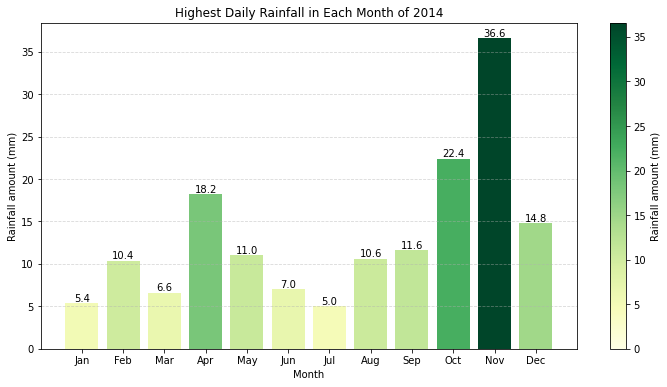

In [51]:
# Visualisation for the highest rainfall in each month of 2014
# Define a color map for the gradient
colors = plt.cm.get_cmap('YlGn')

plt.figure(figsize=(12, 6))
bars = plt.bar(highest_rainfall.index, highest_rainfall.values, color=colors(highest_rainfall.values / highest_rainfall.values.max()))

# Adding annotations for the highest points
for month, rainfall in zip(highest_rainfall.index, highest_rainfall.values):
    plt.text(month, rainfall, str(rainfall), ha='center', va='bottom', fontsize=10)

# Add colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=highest_rainfall.values.max()), cmap='YlGn'))
cbar.set_label('Rainfall amount (mm)')

plt.title('Highest Daily Rainfall in Each Month of 2014')
plt.xlabel('Month')
plt.ylabel('Rainfall amount (mm)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Insights:
* Above graph the highest daily rainfall for each month in 2014
* For example Month 1 which is January reported 5.4mm as the highest daily rainfall.
* It is evident from the results that, November recorded the highest rainfall in 2014 followed by October and April.

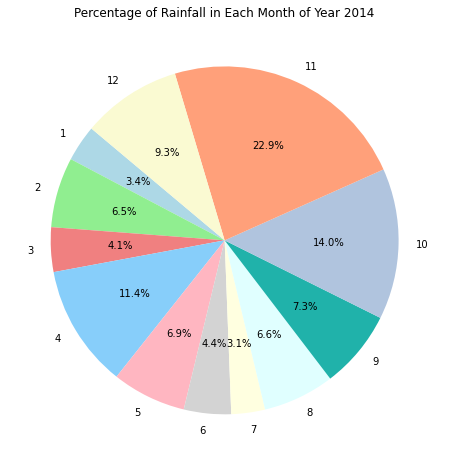

In [52]:
# Calculating total rainfall for the year
total_rainfall = highest_rainfall.sum()

# Calculating percentage of rainfall for each month
percentage_rainfall = {month: (rainfall / total_rainfall) * 100 for month, rainfall in highest_rainfall.items()}

# Defining colors for each month
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightgray',
          'lightyellow', 'lightcyan', 'lightseagreen', 'lightsteelblue', 'lightsalmon', 'lightgoldenrodyellow']

# Plotting the percentage of rainfall for each month in pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage_rainfall.values(), labels=percentage_rainfall.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Rainfall in Each Month of Year 2014')
plt.show()

### Insights
* The pie chart depicts the percentage of rainfall recorded in each month of 2014.
* November month recorded the highest daily rainfall with percentage of 22.9% followed by October 14.0%

## Task 2.2 

Explore the data between 2015 and 2017, and analyse them on both a yearly and monthly basis with visualizations.

In [53]:
#Filtering 2015 and 2017 data alone
daily_rainfall_2015_To_2017 = daily_rainfall[(daily_rainfall['Year'] >= 2015) & (daily_rainfall['Year'] <= 2017) ]
daily_rainfall_2015_To_2017

,Year,Month,Day,Rainfall amount (millimetres)
579,2015,1,1,0.0
580,2015,1,2,0.0
581,2015,1,3,0.0
582,2015,1,4,4.2
583,2015,1,5,0.0
...,...,...,...,...
1670,2017,12,27,0.0
1671,2017,12,28,0.0
1672,2017,12,29,0.2
1673,2017,12,30,8.4


In [54]:
# Yearly analysis
yearly_rainfall_data = daily_rainfall_2015_To_2017.groupby(daily_rainfall_2015_To_2017['Year'])['Rainfall amount (millimetres)'].sum()
yearly_rainfall_data

Year
2015    440.2
2016    599.6
2017    602.0
Name: Rainfall amount (millimetres), dtype: float64

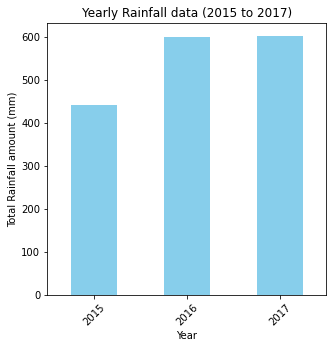

In [55]:
# Plot for yearly rainfall
plt.figure(figsize=(5,5))
yearly_rainfall_data.plot(kind='bar', color='skyblue')
plt.title('Yearly Rainfall data (2015 to 2017)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall amount (mm)')
plt.xticks(rotation=45)
plt.show()

### Insights
* The graph clearly illustrates that in 2017 and 2016, the total rainfall was nearly identical. However, 2017 stands out with the highest recorded rainfall amount of 602.0 mm.
* 2015 ranks as the lowest rainfall year

In [56]:
# Monthly analysis
monthly_rainfall_data = daily_rainfall_2015_To_2017.groupby([daily_rainfall_2015_To_2017['Year'], daily_rainfall_2015_To_2017['Month']])['Rainfall amount (millimetres)'].sum()
monthly_rainfall_data

Year  Month
2015  1         47.4
      2         37.8
      3         23.0
      4         36.8
      5         37.6
      6         28.8
      7         58.0
      8         38.2
      9         30.6
      10        12.2
      11        43.0
      12        46.8
2016  1         48.0
      2          9.0
      3         35.6
      4         48.6
      5         57.0
      6         54.4
      7         64.2
      8         61.2
      9         87.2
      10        63.4
      11        31.4
      12        39.6
2017  1         31.6
      2         40.2
      3         26.4
      4        123.4
      5         25.0
      6         16.8
      7         30.4
      8         53.8
      9         39.6
      10        40.4
      11        46.0
      12       128.4
Name: Rainfall amount (millimetres), dtype: float64

In [57]:
#Filtering each year separately
daily_rainfall_data_2015 = daily_rainfall[(daily_rainfall['Year'] == 2015)]
daily_rainfall_data_2016 = daily_rainfall[(daily_rainfall['Year'] == 2016)]
daily_rainfall_data_2017 = daily_rainfall[(daily_rainfall['Year'] == 2017)]

# Monthly aggregation between 2015 and 2017
monthly_rainfall_data_2015 = daily_rainfall_data_2015.groupby('Month')['Rainfall amount (millimetres)'].sum()
monthly_rainfall_data_2016 = daily_rainfall_data_2016.groupby('Month')['Rainfall amount (millimetres)'].sum()
monthly_rainfall_data_2017 = daily_rainfall_data_2017.groupby('Month')['Rainfall amount (millimetres)'].sum()


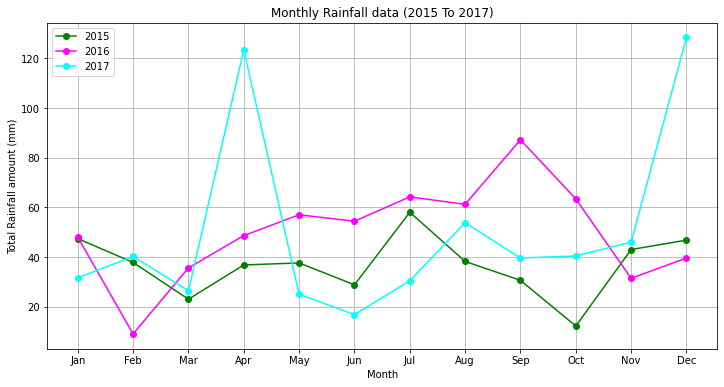

In [58]:
# Plot for monthly rainfall data between 2015 and 2017
plt.figure(figsize=(12, 6))
plt.plot(monthly_rainfall_data_2015.index, monthly_rainfall_data_2015.values, marker='o', color='green', label='2015')
plt.plot(monthly_rainfall_data_2016.index, monthly_rainfall_data_2016.values, marker='o', color='magenta', label='2016')
plt.plot(monthly_rainfall_data_2017.index, monthly_rainfall_data_2017.values, marker='o', color='cyan', label='2017')
plt.title('Monthly Rainfall data (2015 To 2017)')
plt.xlabel('Month')
plt.ylabel('Total Rainfall amount (mm)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

### Insights
* The graph shows the monthly total rainfall of each year which is differentiated using various colours.
* It can be inferred from the graph that, there is a similar rainfall pattern between 2015 and 2016, which started with the same rainfall amount in Jan, and 2016 recorded a slightly higher amount in the consecutive months till Dec except Feb.
* 2017 shows irregular rainfall pattern

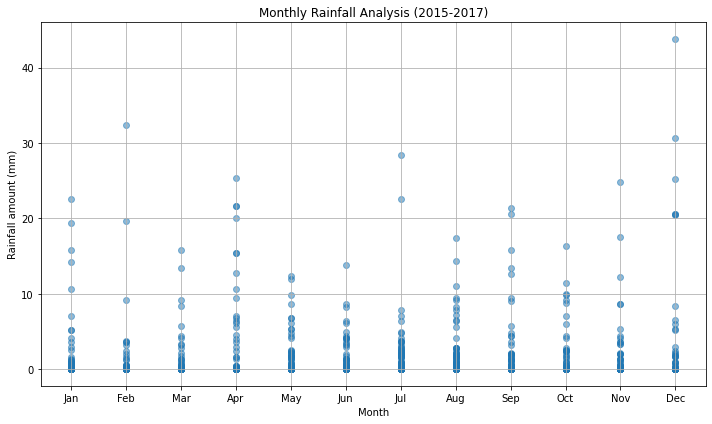

In [59]:
#scatter plot grouping the rainfall based on month
plt.figure(figsize=(10, 6))
plt.scatter(daily_rainfall_2015_To_2017['Month'], daily_rainfall_2015_To_2017['Rainfall amount (millimetres)'], alpha=0.5)
plt.title('Monthly Rainfall Analysis (2015-2017)')
plt.xlabel('Month')
plt.ylabel('Rainfall amount (mm)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights
* The above graph shows, all the daily rainfall recorded in particular month for all the 3 years.
* Most of the daily rainfall ranges between 0 - 10mm.
* Outliers are marked with light colors

## Task 2.3 

Explore the data, and find the top 3 years with the highest rainfall amount and the top 3 years with the lowest rainfall amount, then compare them.

In [60]:
#aggregate value of yearly rainfall
overall_rainfall = daily_rainfall.groupby(daily_rainfall['Year'])['Rainfall amount (millimetres)'].sum()
overall_rainfall

Year
2013    381.2
2014    432.0
2015    440.2
2016    599.6
2017    602.0
2018    516.4
2019    375.4
2020    786.8
2021    684.6
2022    699.4
2023    575.4
Name: Rainfall amount (millimetres), dtype: float64

In [61]:
#Finding the highest 3 years
highest_year = overall_rainfall.nlargest(3)
highest_year

Year
2020    786.8
2022    699.4
2021    684.6
Name: Rainfall amount (millimetres), dtype: float64

In [62]:
#Finding the lowest 3 years
lowest_year = overall_rainfall.nsmallest(3)
lowest_year

Year
2019    375.4
2013    381.2
2014    432.0
Name: Rainfall amount (millimetres), dtype: float64

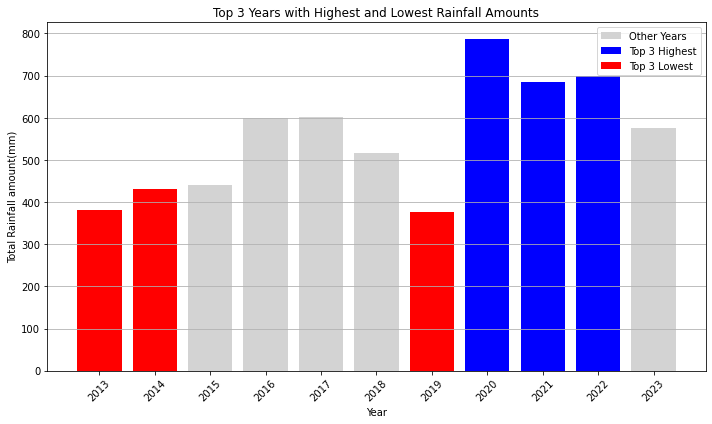

In [63]:
#Bar graph highlighting the top 3 years with highest and lowest rainfall
plt.figure(figsize=(10, 6))
plt.bar(overall_rainfall.index, overall_rainfall.values, color='lightgrey', label='Other Years')

# Plotting the top 3 years with the highest and lowest rainfall amounts
plt.bar(highest_year.index, highest_year.values, color='blue', label='Top 3 Highest')
plt.bar(lowest_year.index, lowest_year.values, color='red', label='Top 3 Lowest')

plt.title('Top 3 Years with Highest and Lowest Rainfall Amounts')
plt.xlabel('Year')
plt.ylabel('Total Rainfall amount(mm)')
plt.legend()
plt.grid(axis='y')
plt.xticks(range(2013,2024),rotation=45)
plt.tight_layout()
plt.show()

### Insights
* The above graph depicts the highest and lowest total rainfall recorded in a year.
* Highest is marked in blue and lowest years are marked in red while the remaining years are graded out.
* Year 2020 recorded the highest rainfall and 2019 recorded the lowest rainfall.

# Task 2.4

Explore the changes of rainfall in ABC City in the last 10 years.

In [64]:
#Displaying last 10 years
last_10yrs = (daily_rainfall['Year'].max()- 9)
daily_rainfall_10yrs = daily_rainfall[(daily_rainfall['Year'] <=2024) & (daily_rainfall['Year'] >= last_10yrs) ]
daily_rainfall_10yrs

,Year,Month,Day,Rainfall amount (millimetres)
214,2014,1,1,0.0
215,2014,1,2,5.2
216,2014,1,3,0.0
217,2014,1,4,0.0
218,2014,1,5,0.2
...,...,...,...,...
3861,2023,12,27,3.0
3862,2023,12,28,0.8
3863,2023,12,29,0.0
3864,2023,12,30,0.0


In [65]:
#Summary statistics for 10 years data
daily_rainfall_10yrs.describe()

,Year,Month,Day,Rainfall amount (millimetres)
count,3652.000000,3652.000000,3652.000000,3652.000000
mean,2018.499726,6.523549,15.727820,1.564020
std,2.872293,3.449005,8.800529,4.366194
min,2014.000000,1.000000,1.000000,0.000000
25%,2016.000000,4.000000,8.000000,0.000000
50%,2018.500000,7.000000,16.000000,0.000000
75%,2021.000000,10.000000,23.000000,1.000000
max,2023.000000,12.000000,31.000000,54.600000


In [66]:
#aggregate value of yearly rainfall
overall_rainfall_10yr = daily_rainfall_10yrs.groupby(daily_rainfall['Year'])['Rainfall amount (millimetres)'].sum()
overall_rainfall_10yr

Year
2014    432.0
2015    440.2
2016    599.6
2017    602.0
2018    516.4
2019    375.4
2020    786.8
2021    684.6
2022    699.4
2023    575.4
Name: Rainfall amount (millimetres), dtype: float64

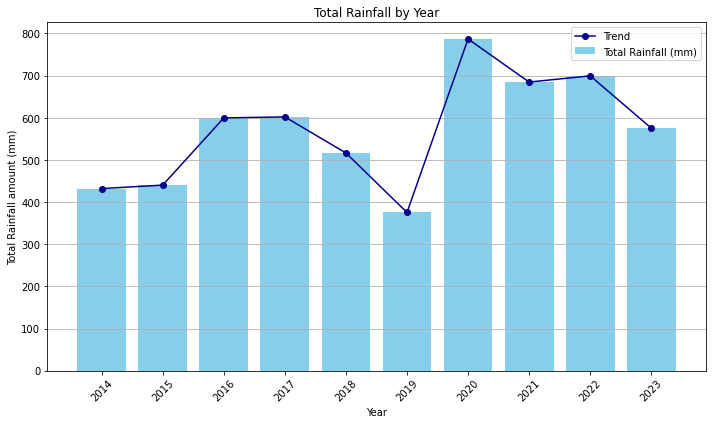

In [67]:
#Bar graph depicting changes of rainfall in last 10 years

plt.figure(figsize=(10, 6))
plt.bar(overall_rainfall_10yr.index, overall_rainfall_10yr.values, color='skyblue', label='Total Rainfall (mm)')
plt.title('Total Rainfall by Year')
plt.xlabel('Year')
plt.ylabel('Total Rainfall amount (mm)')
plt.grid(axis='y')

# Overlay line graph to show the trend
plt.plot(overall_rainfall_10yr.index, overall_rainfall_10yr.values, color='darkblue', marker='o', linestyle='-', label='Trend')
plt.xticks(range(2014,2024),rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Insights
* The bar graph depicts the total rainfall recorded in each year from 2014-2023.
* There trend is irregular with having similar rainfall amount in 2014 & 2015 and reaching a peak in 2020 and reducing gradually.
* Year 2020 shows the highest recorded rainfall followed by 2022

In [68]:
# Aggregation (monthly totals)
monthly_rainfall = daily_rainfall_10yrs.groupby(['Year', 'Month'])['Rainfall amount (millimetres)'].sum().reset_index()
monthly_rainfall

,Year,Month,Rainfall amount (millimetres)
0,2014,1,13.4
1,2014,2,22.4
2,2014,3,21.8
3,2014,4,68.0
4,2014,5,33.8
...,...,...,...
115,2023,8,22.4
116,2023,9,10.8
117,2023,10,76.0
118,2023,11,42.4


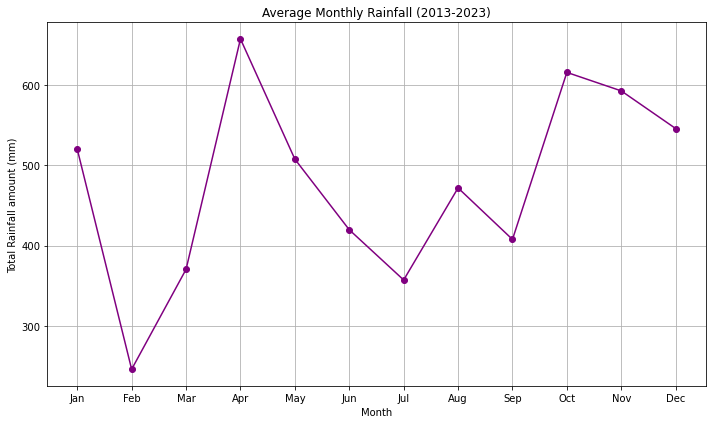

In [69]:
# Grouping data by month and calculating the total rainfall for each month
monthly_totals = monthly_rainfall.groupby('Month')['Rainfall amount (millimetres)'].sum()

# Plot depicting the overall monthly rainfall to get insight about the seasonal pattern between 2013-2023
plt.figure(figsize=(10, 6))
plt.plot(monthly_totals.index, monthly_totals.values, marker='o', color='purple', linestyle='-')
plt.title('Average Monthly Rainfall (2013-2023)')
plt.xlabel('Month')
plt.ylabel('Total Rainfall amount (mm)')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights
* The above graph shows the total rainfall recorded in each month for all the 10 years.
* It is evident that April month recorded the highest rainfall which maybe due to the season.

### References:
1. https://pandas.pydata.org/docs/
2. https://matplotlib.org/
3. https://matplotlib.org/stable/api/cm_api.html
4. https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/
5. https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/
6. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html